In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def video_to_numpy_array(video_path, frame_rate=30):
    """
    Convert a video file to a NumPy array.
    
    Args:
    video_path (str): Path to the video file.
    frame_rate (int): Desired frame rate for capturing frames.
    
    Returns:
    np.ndarray: A 4D NumPy array representing the video frames.
    """
    # Initialize the video capture object
    cap = cv2.VideoCapture(video_path)
    
    # Check if the video file was opened successfully
    if not cap.isOpened():
        raise ValueError(f"Error opening video file: {video_path}")
    
    # Get video properties
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    num_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    # Create a 4D NumPy array to store the frames
    frames = np.zeros((height, width, 3, num_frames), dtype=np.uint8)
    
    # Capture frames and store them in the NumPy array
    frame_count = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        
        # Convert the frame to BGR color space (required by OpenCV)
        frame_bgr = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
        
        # Store the frame in the NumPy array
        frames[:, :, :, frame_count] = frame_bgr
        frame_count += 1
    
    # Release the video capture object
    cap.release()
    
    return frames

# Example usage
video_path = "MVI_1355.MOV"
video_array = video_to_numpy_array(video_path)

print(f"Video converted to NumPy array with shape: {video_array.shape}")

Video converted to NumPy array with shape: (720, 1280, 3, 253)


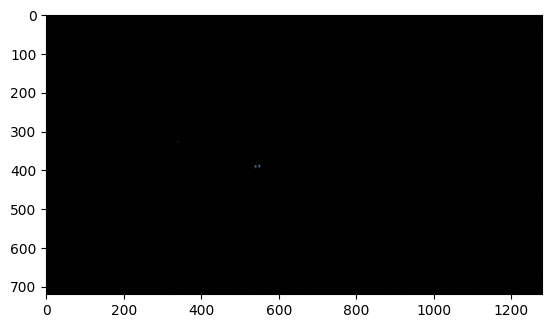

In [3]:
fig, ax = plt.subplots()
ax.imshow(video_array[:,:,:,-1])

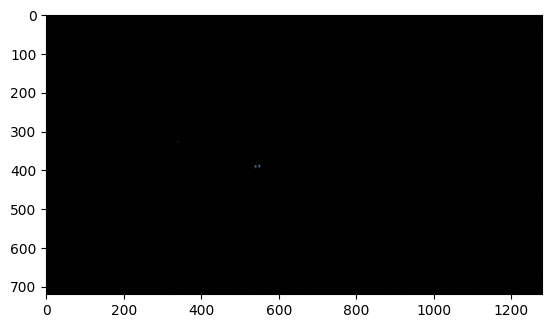

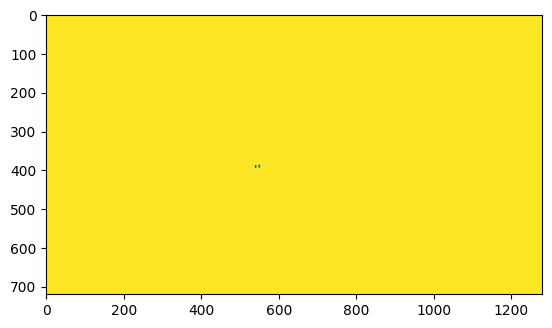

Detected 1 light spots:
Light spot 1: Diameter ≈ 1467.24 pixels


In [11]:
import cv2
import numpy as np

def measure_multiple_light_spots(np_array):
    """
    Measure the diameters of multiple light spots in a NumPy array.
    
    Args:
    np_array (np.ndarray): A 2D or 3D NumPy array containing the image data.
    
    Returns:
    list[float]: List of diameters of the detected light spots in pixels.
    """
    plt.imshow(np_array)
    plt.show()
    try:
        # Convert the NumPy array to grayscale if it's RGB
        if len(np_array.shape) == 3 and np_array.shape[2] == 3:
            gray = cv2.cvtColor(np_array, cv2.COLOR_BGR2GRAY)
        else:
            gray = np_array
        
        # Apply adaptive thresholding
        _, thresh = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
        plt.imshow(thresh)
        plt.show()
        # Find contours of all light spots
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        if len(contours) == 0:
            raise ValueError("No light spots detected in the image.")
        
        # List to store diameters
        diameters = []
        
        # Iterate through all contours
        for contour in contours:
            # Calculate the bounding circle of the contour
            (x, y), radius = cv2.minEnclosingCircle(contour)
            
            # Calculate the diameter
            diameter = 2 * radius
            
            # Append the diameter to the list
            diameters.append(diameter)
        
        return diameters
    
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Example usage
np_array = np.random.rand(480, 640)  # Example 2D NumPy array
# Or load your existing NumPy array
# np_array = np.load('your_data.npy')

diameters = measure_multiple_light_spots(video_array[:,:,:,-1])

if diameters is not None:
    print(f"Detected {len(diameters)} light spots:")
    for i, diameter in enumerate(diameters, 1):
        print(f"Light spot {i}: Diameter ≈ {diameter:.2f} pixels")
else:
    print("Unable to measure the diameters of the light spots.")
